D. Time-series analysis

You will investigate more closely the created_datetime and last_modified_datetime . First,
you will analyze the mean time difference between these two values. And second, you
will analyze the mean number of created items per month over the timeline of the data.
For the second question, you will also choose an appropriate method to visualize your
findings.

In [1]:
#investigate more closely the created_datetime and last_modified_datetime 
import numpy as np
import pandas as pd
#from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
#
#Importing and cleaning the data
#The full dataset has 356027 entries -> use full dataset , because 2 columns are used
df = pd.read_csv('en.openfoodfacts.org.products.tsv',usecols=['created_datetime', 'last_modified_datetime'],nrows=356027,low_memory=False,na_filter=False,sep='\t')
df.head(5)

,created_datetime,last_modified_datetime
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
4,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z


In [2]:
# First, you will analyze the mean time difference between these two values
# Convert dataframe to datetime64

In [3]:
df.iloc[1]

created_datetime          2017-03-09T14:32:37Z
last_modified_datetime    2017-03-09T14:32:37Z
Name: 1, dtype: object

In [4]:
df.columns

Index(['created_datetime', 'last_modified_datetime'], dtype='object')

In [5]:
# Convert argument to datetime
# if errors ‘coerce’ invalid parsing will be set as NaT
df_Created=pd.to_datetime(df['created_datetime'], errors='coerce')
print('df_Created=',df_Created.dtype)
df_Modified=pd.to_datetime(df['last_modified_datetime'], errors='coerce')
print('df_Modified=',df_Modified.dtype)

df_Created= datetime64[ns]
df_Modified= datetime64[ns]


In [7]:
# Calculate difference
df_Diff=df_Modified-df_Created
df_Diff.head(9)

0   00:00:27
1   00:00:00
2   00:00:00
3   00:00:00
4   00:00:00
5   00:00:00
6   00:00:00
7   00:00:01
8   00:00:00
dtype: timedelta64[ns]

In [8]:
df_Diff.describe()

count                      356000
mean     108 days 03:35:07.638426
std      283 days 13:39:56.859215
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:01
75%        8 days 18:31:35.250000
max            2033 days 13:40:59
dtype: object

In [9]:
print('Max is high with = ',df_Diff.max())
print('with many 0 differences')
print('Mean is = ',df_Diff.mean())

Max is high with =  2033 days 13:40:59
with many 0 differences
Mean is =  108 days 03:35:07.638426


In [10]:
# Second analyze the mean number of created items per month over the timeline of the data
# Calculate timeline of the data

In [11]:
df_Created.describe()

count                  356000
unique                 224738
top       2017-03-09 10:37:09
freq                       20
first     2012-01-31 14:43:58
last      2017-09-18 01:35:39
Name: created_datetime, dtype: object

In [12]:
df_Modified.describe()

count                  356001
unique                 216832
top       2015-08-09 17:35:42
freq                       30
first     2012-03-21 22:15:32
last      2017-09-18 01:35:45
Name: last_modified_datetime, dtype: object

In [13]:
print('Timeline:')
print('first datetime = ',df_Created.min())
print('last datetime = ',df_Created.max())

Timeline:
first datetime =  2012-01-31 14:43:58
last datetime =  2017-09-18 01:35:39


In [14]:
# Create datetime Series
ts1 = pd.Series(np.arange(len(df)), df_Created)
#  number of created items per month over the timeline of the data
df_Month = ts1.resample('M').count()
df_Month.head(9)

created_datetime
2012-01-31      1
2012-02-29     13
2012-03-31    170
2012-04-30    221
2012-05-31    458
2012-06-30    904
2012-07-31    516
2012-08-31    164
2012-09-30    460
dtype: int64

In [15]:
df_Month.describe()

count        69.000000
mean       5159.420290
std       21448.701657
min           1.000000
25%         750.000000
50%        1512.000000
75%        3680.000000
max      179055.000000
dtype: float64

In [16]:
print('Mean created items per month = ',df_Month.mean())

Mean created items per month =  5159.42028986


In [17]:
# For the second question, 
# you will also choose an appropriate method to visualize your findings.

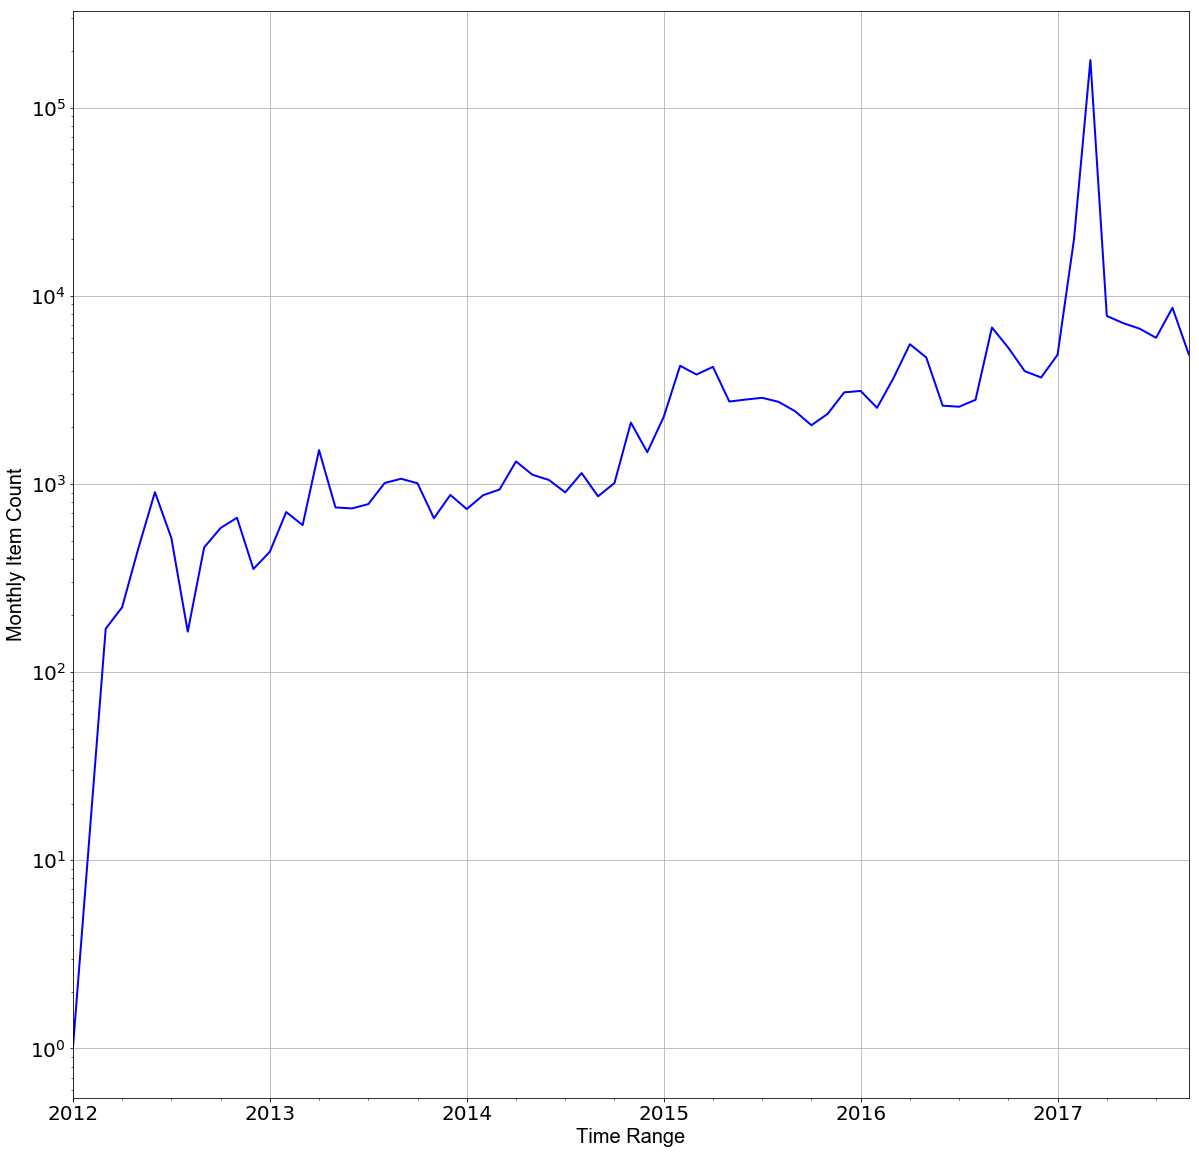

In [18]:
#Graph over Time with log y-axis, bacause range is from 0 to high number
font={'fontname':'Arial', 'size':'20'}
plt.figure(figsize=(20,20))
df_Month.plot(color='blue', lw=2)
plt.yscale('log')
plt.grid(True)
plt.ylabel('Monthly Item Count', font)
plt.xlabel("Time Range", font)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [19]:
# -> More items are in younger time